**Efekt Rungego**

In [51]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

**Zadanie 1.**

In [52]:
# Functions definition
f1 = np.vectorize(lambda x: 1/(1 + 25*x**2))
f2 = np.vectorize(lambda x: np.exp(np.cos(x)))

In [53]:
# Lagrange interpolation polynomial
lagrange_coefficients = lambda t, j, x: np.prod(t-x[x!=x[j]])/np.prod(x[j]-x[x!=x[j]])
lagrange_polynomial = lambda t, x, y: np.sum([y[j] * lagrange_coefficients(t, j, x) for j in range(len(y))])

# Cubic spline interpolation polynomial
cubic_spline_polynomial = lambda x, y: scipy.interpolate.interp1d(x, y, kind='cubic')

# Lagrange interpolation polynomial using Chebyshev nodes
chebyshev_nodes = lambda a, b, n: np.array([0.5*(a + b) + 0.5*(b - a)*np.cos((2*j + 1)*np.pi/(2*(n + 1)))
                                             for j in range(n)])

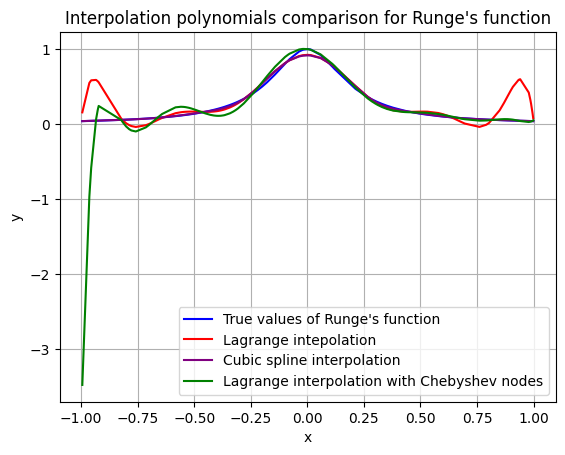

In [54]:
n = 12
x = np.linspace(-1.0, 1.0, n, endpoint=True)
x_chebyshev = chebyshev_nodes(-1.0, 1.0, n)
y = f1(x)
y_chebyshev = f1(x_chebyshev)
t = sorted(np.random.uniform(-1.0, 1.0, size=10*n))
plt.plot(t, f1(t), label="True values of Runge's function", color="blue")
plt.plot(t, [lagrange_polynomial(j, x, y) for j in t], label="Lagrange intepolation", color="red")
plt.plot(t, cubic_spline_polynomial(x, y)(t), label="Cubic spline interpolation", color="purple")
plt.plot(t, [lagrange_polynomial(j, x_chebyshev, y_chebyshev) for j in t], label="Lagrange interpolation with Chebyshev nodes"
         , color="green")
plt.title("Interpolation polynomials comparison for Runge's function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

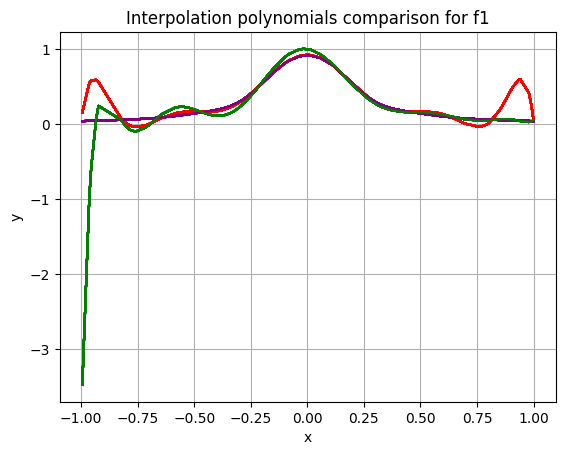

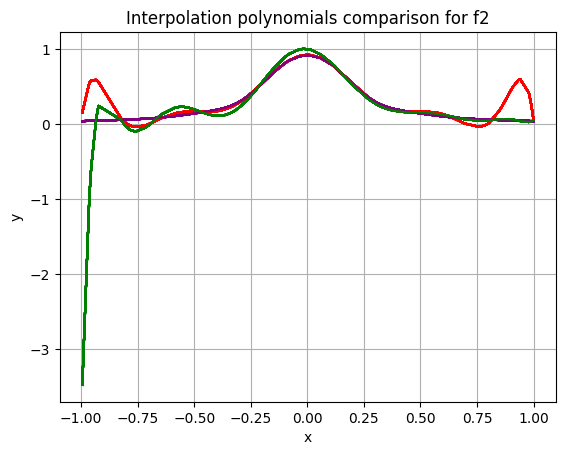

In [55]:
for n in range(4, 51):
    x1 = np.linspace(-1.0, 1.0, n, endpoint=True)
    x_chebyshev1 = chebyshev_nodes(-1.0, 1.0, n)
    y1 = f1(x)
    y_chebyshev1 = f1(x_chebyshev1)
    t1 = sorted(np.random.uniform(-1.0, 1.0, size=500))
    plt.plot(t, [lagrange_polynomial(j, x, y) for j in t], color="red")
    plt.plot(t, cubic_spline_polynomial(x, y)(t), color="purple")
    plt.plot(t, [lagrange_polynomial(j, x_chebyshev, y_chebyshev) for j in t], color="green")
 
plt.title("Interpolation polynomials comparison for f1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

for n in range(4, 51):
    x2 = np.linspace(0.0, 2.0*np.pi, n, endpoint=True)
    x_chebyshev2 = chebyshev_nodes(0.0, 2.0*np.pi, n)
    y2 = f2(x)
    y_chebyshev2 = f2(x_chebyshev2)
    t1 = sorted(np.random.uniform(-1.0, 1.0, size=500))
    plt.plot(t, [lagrange_polynomial(j, x, y) for j in t], color="red")
    plt.plot(t, cubic_spline_polynomial(x, y)(t), color="purple")
    plt.plot(t, [lagrange_polynomial(j, x_chebyshev, y_chebyshev) for j in t], color="green")
    
plt.title("Interpolation polynomials comparison for f2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()